## PERFORMING A SIMPLE LINEAR REGRESSION PROJECT WITH THE FOLLOWING STEPS BELOW

#### STEP 1 : IMPORTING THE NECESSARY LIBRARIES

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from scipy.stats import t


#### STEP 2 : LOADING THE DATA INTO DATAFRAME

In [212]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


#### STEP 3 : ADDING THE TARGET VALUE AS THE NEW COLUMN INTO THE DATAFRAME

In [213]:
df['HouseValue'] = california_housing.target


df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### STEP 4 : SLICING THE REGRESSOR AND RESPONSE COLUMNS

In [214]:
X = df.iloc[:, 0 ].values  ## here we are selecting only 1 feature column (house age) as we are performing simple linear regression model

y = df.iloc[:, 8].values

In [215]:
X = X.reshape(-1, 1)

In [216]:
print(X.shape)
print(y.shape)

(20640, 1)
(20640,)


#### STEP 5 : FITTING THE MODEL AND OBTAINING THE ESTIMATES OF BIAS AND REGRESSION COEFFICIENT

In [217]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [218]:
beta_1_hat = model.coef_[0] 
beta_0_hat = model.intercept_

In [219]:
print("The slope or regression coefficient is:", beta_1_hat)
print("The intercept or bias is:", beta_0_hat)

The slope or regression coefficient is: 0.4179384920189627
The intercept or bias is: 0.45085576703267916


#### STEP 6 : INLINE PREDICTION

In [220]:
y_pred = model.predict(X)
y_pred

array([3.9302773 , 3.92033036, 3.48400258, ..., 1.1613512 , 1.23123052,
       1.44914365])

#### STEP 7 : VISUALIZING THE SCATTER PLOT

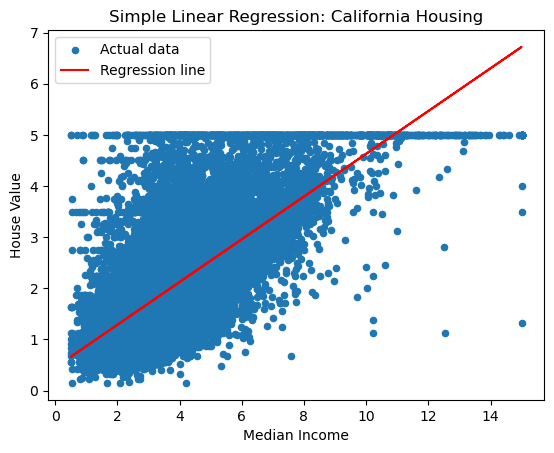

In [221]:
plt.scatter(X, y, s=20, label='Actual data')  # Scatter plot of actual data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Regression line
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('Simple Linear Regression: California Housing')
plt.legend()
plt.show()

#### STEP 8 : ESTIMATING THE ERROR VARIANCE

In [222]:
## Calculating the residuals
residuals = y - y_pred

## Calculating the sum of squared residuals (SSR)
ssr = np.sum(residuals**2)

In [223]:
n = len(X)
## Estimating the error variance
sigma_squared_hat = ssr / (n - 2)   ## n - 2 is the degrees of freedom
print("Estimated error variance is:", sigma_squared_hat)

Estimated error variance is: 0.7011990959417842


#### STEP 9 : OBTAINING THE QUANTILE (t-table) VALUES 

In [224]:
confidence_coefficient = 0.97
alpha = (1 - confidence_coefficient)
t_value = t.ppf((1 - (alpha/2)), len(X) - 2)
t_value

2.1702404709717773

#### STEP 10 : COMPUTING THE STANDARD ERRORS

In [225]:
X_bar = np.mean(X)
Sxx = np.sum((X - X_bar)**2)
Sxx

74492.80831535524

In [226]:
se_b1_hat = np.sqrt(sigma_squared_hat/Sxx)
se_b1_hat

0.0030680575388678374

In [227]:
n = len(X)
X_bar_squared = X_bar**2
X_bar_squared

14.9820940127449

In [228]:
se_b0_hat = np.sqrt(sigma_squared_hat*((1/n) + (X_bar_squared/Sxx)))
se_b0_hat

0.013228716177148086

In [229]:
print("Standard Errors of beta_0_hat(bias):", se_b0_hat)
print("Standard Errors of beta_1_hat(regression_coefficient):", se_b1_hat)

Standard Errors of beta_0_hat(bias): 0.013228716177148086
Standard Errors of beta_1_hat(regression_coefficient): 0.0030680575388678374


#### STEP 11 : COMPUTING THE CONFIDENCE LIMITS

In [230]:
lower_b0 = beta_0_hat - t_value * se_b0_hat
upper_b0 = beta_0_hat + t_value * se_b0_hat
lower_b1 = beta_1_hat - t_value * se_b1_hat
upper_b1 = beta_1_hat + t_value * se_b1_hat

#### STEP 12 : PRINTING THE CONFIDENCE INTERVALS WITH CONFIDENCE COEFFICIENT OF 97%

In [231]:
print("Confidence Interval for Beta_0(bias):", "(",lower_b0, ",", upper_b0,")")
print("Confidence Interval for Beta_1(regression_coefficient):", "(", lower_b1, ",", upper_b1,")")

Confidence Interval for Beta_0(bias): ( 0.4221462718060333 , 0.479565262259325 )
Confidence Interval for Beta_1(regression_coefficient): ( 0.41128006938084166 , 0.42459691465708377 )


#### STEP 13 : COMPUTING R_SQUARED VALUE (MODEL ADEQUACY)

In [232]:
r_squared = model.score(X, y)
r_squared

0.47344749180719903